In [4]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
from tqdm import tqdm, tqdm_pandas
import matplotlib.pyplot as plt

tqdm.pandas()

New Balance TWO WXY V3
Adidas Trae Young 2.0
Under Armour Curry 10
Nike Zoom Freak 4
Nike Lebron 20
Li-Ning Wade 808 2
Puma TRC Blaze Court
Nike Cosmic Unity 2
Nike Air Zoom G.T. Cut 2
Nike Giannis Immortality 2
Puma MB.01 Lo
Nike Precision 6
Li-Ning Way of Wade 10
Jordan Luka 1
New Balance TWO WXY V2
Air Jordan 36 Low
Nike Renew Elevate 3
Nike KD 15
Nike Kyrie Low 5
Nike Lebron 19 Low


In [9]:
def scrape_shoe_attribution():
    styles = []
    shoe_names = []
    style_filters = ['Low%20Top', 'Mid%20Top', 'High%20Top']
    cuts = [x.replace('%20', ' ') for x in style_filters]
    for i, style_filter in enumerate(style_filters):
        print(f'Scraping {cuts[i]} shoes')
        for page_num in range(1, 10):
            try:
                url = f'https://www.thehoopsgeek.com/shoe-reviews/?pg={page_num}&style={style_filter}'
                page = requests.get(url)
                html_contents = page.text
                soup = BeautifulSoup(html_contents, 'html.parser')
                divs = soup.find_all('div', class_='css-34qrcr-ShoeListWithPictures')
                for div in divs:
                    shoe_name = div.find('h2').getText()
                    shoe_names.append(shoe_name)
                    styles.append(cuts[i])
            except:
                continue
    return styles, shoe_names
            
styles, shoe_names = scrape_shoe_attribution()

Scraping Low Top shoes
Scraping Mid Top shoes
Scraping High Top shoes


In [10]:
data = [[styles[i], shoe_names[i]] for i in range(len(styles))]
df = pd.DataFrame(data, columns=['Style', 'Shoe'])
df

,Style,Shoe
0,Low Top,Puma All Pro Nitro
1,Low Top,Jordan Luka 2
2,Low Top,Puma Stewie 2
3,Low Top,Li-Ning Wade Fission 8
4,Low Top,Adidas BYW Select
...,...,...
254,High Top,Adidas Crazy Explosive PrimeKnit 2017
255,High Top,Nike KD 9 Elite
256,High Top,Jordan Ultra Fly 2
257,High Top,Nike Lebron 14


In [11]:
df.to_csv('shoe-styles.csv', index=False)

In [12]:
shoe_names = pd.read_csv('shoe-metadata.csv')
shoe_names

,Shoe Tag,Shoe Name
0,shoe_1.jpg,361 AG1
1,shoe_2.jpg,361 Big 3
2,shoe_3.jpg,361 DVD/SD 1
3,shoe_4.jpg,361 Jing Feng
4,shoe_5.jpg,Adidas adiPower Weightlifting 2
...,...,...
560,shoe_577.jpg,Under Armour M-TAG
561,shoe_578.jpg,Vans Classic Slip-on
562,shoe_579.jpg,Wade All City 8
563,shoe_580.jpg,Xtep Levitation 4


In [20]:
shoe_names['Shoe Name Lower'] = shoe_names['Shoe Name'].str.lower()
df['Shoe Lower'] = df['Shoe'].str.lower()
merged = pd.merge(shoe_names, df, how='right', left_on='Shoe Name Lower', right_on='Shoe Lower')
merged = merged.dropna(subset=['Shoe Tag', 'Shoe Name', 'Shoe Name Lower'])
merged = merged.drop(columns=['Shoe Name Lower', 'Shoe Lower'])
merged.to_csv('shoe-dataset.csv', index=False)
merged

,Shoe Tag,Shoe Name,Style,Shoe
4,shoe_12.jpg,Adidas BYW Select,Low Top,Adidas BYW Select
5,shoe_244.jpg,Jordan Tatum 1,Low Top,Jordan Tatum 1
11,shoe_348.jpg,Nike Ja 1,Low Top,Nike Ja 1
20,shoe_300.jpg,New Balance Two Wxy V3,Low Top,New Balance TWO WXY V3
23,shoe_442.jpg,Nike Zoom Freak 4,Low Top,Nike Zoom Freak 4
...,...,...,...,...
249,shoe_148.jpg,Anta KT3,High Top,ANTA KT3
250,shoe_558.jpg,Under Armour Curry 4,High Top,Under Armour Curry 4
251,shoe_39.jpg,Adidas D Rose 8,High Top,Adidas D Rose 8
252,shoe_567.jpg,Under Armour Drive 4,High Top,Under Armour Drive 4


In [21]:
merged['Style'].value_counts()

Style
Low Top     76
High Top    36
Mid Top     32
Name: count, dtype: int64

In [22]:
pos_score_dict = {
    'Guard': 1,
    'Forward': 2,
    'Center': 3
}

player_df = pd.read_csv('./player-shoes-data.csv')
player_df['pos_score'] = player_df['Position'].apply(lambda x: pos_score_dict[x])
player_df

,Player,Player Page Link,Current Kicks,Position,pos_score
0,Precious Achiuwa,https://ballershoesdb.com/players/precious-ach...,Anta Daringly 3.0,Forward,2
1,Steven Adams,https://ballershoesdb.com/players/steven-adams/,New Balance Two Wxy V3,Center,3
2,Bam Adebayo,https://ballershoesdb.com/players/bam-adebayo/,Air Jordan 37,Forward,2
3,Santi Aldama,https://ballershoesdb.com/players/santi-aldama/,Nike Kyrie Low 5,Forward,2
4,Nickeil Alexander-Walker,https://ballershoesdb.com/players/nickeil-alex...,Nike Kobe 5 Protro,Guard,1
...,...,...,...,...,...
441,Thaddeus Young,https://ballershoesdb.com/players/thaddeus-young/,Nike Kobe 6 Protro,Forward,2
442,Trae Young,https://ballershoesdb.com/players/trae-young/,Adidas Trae Young 2,Guard,1
443,Omer Yurtseven,https://ballershoesdb.com/players/omer-yurtseven/,Nike Kobe 5 Protro,Center,3
444,Cody Zeller,https://ballershoesdb.com/players/cody-zeller/,Air Jordan 37,Center,3


In [26]:
merged_df = pd.merge(player_df, merged, how='left', right_on='Shoe Name', left_on='Current Kicks')
merged_df = merged_df.dropna(subset=['Shoe Name'])
style_score_mapping = {'Low Top': 1, 'Mid Top': 2, 'High Top': 3}
merged_df['style_score'] = merged_df['Style'].apply(lambda x: style_score_mapping[x])
merged_df

,Player,Player Page Link,Current Kicks,Position,pos_score,Shoe Tag,Shoe Name,Style,Shoe,style_score
1,Steven Adams,https://ballershoesdb.com/players/steven-adams/,New Balance Two Wxy V3,Center,3,shoe_300.jpg,New Balance Two Wxy V3,Low Top,New Balance TWO WXY V3,1
2,Bam Adebayo,https://ballershoesdb.com/players/bam-adebayo/,Air Jordan 37,Forward,2,shoe_122.jpg,Air Jordan 37,High Top,Air Jordan 37,3
3,Santi Aldama,https://ballershoesdb.com/players/santi-aldama/,Nike Kyrie Low 5,Forward,2,shoe_394.jpg,Nike Kyrie Low 5,Low Top,Nike Kyrie Low 5,1
4,Nickeil Alexander-Walker,https://ballershoesdb.com/players/nickeil-alex...,Nike Kobe 5 Protro,Guard,1,shoe_369.jpg,Nike Kobe 5 Protro,Low Top,Nike Kobe 5 Protro,1
5,Grayson Allen,https://ballershoesdb.com/players/grayson-allen/,Nike Giannis Immortality 2,Guard,1,shoe_332.jpg,Nike Giannis Immortality 2,Low Top,Nike Giannis Immortality 2,1
...,...,...,...,...,...,...,...,...,...,...
438,Christian Wood,https://ballershoesdb.com/players/christian-wood/,Adidas Dame 8,Forward,2,shoe_52.jpg,Adidas Dame 8,Low Top,Adidas Dame 8,1
440,Delon Wright,https://ballershoesdb.com/players/delon-wright/,Nike Kyrie Low 5,Guard,1,shoe_394.jpg,Nike Kyrie Low 5,Low Top,Nike Kyrie Low 5,1
441,Thaddeus Young,https://ballershoesdb.com/players/thaddeus-young/,Nike Kobe 6 Protro,Forward,2,shoe_370.jpg,Nike Kobe 6 Protro,Low Top,Nike Kobe 6 Protro,1
443,Omer Yurtseven,https://ballershoesdb.com/players/omer-yurtseven/,Nike Kobe 5 Protro,Center,3,shoe_369.jpg,Nike Kobe 5 Protro,Low Top,Nike Kobe 5 Protro,1


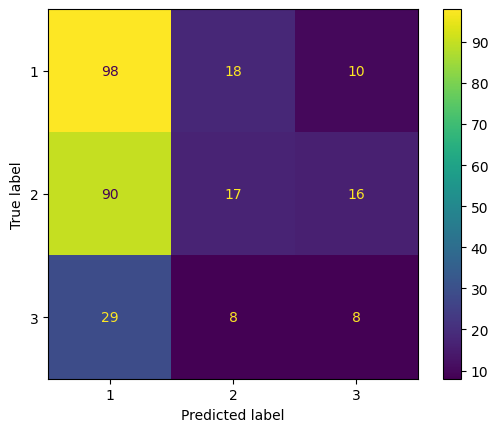

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pos_scores = merged_df['pos_score'].to_list()
style_scores = merged_df['style_score'].to_list()
cm = confusion_matrix(pos_scores, style_scores, labels=[1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 2, 3])
disp.plot()